<a href="https://colab.research.google.com/github/rewaaalaa7/gold-price-prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
goldData = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
goldData.shape

(2290, 6)

In [ ]:
goldData.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
goldData.head(15).style.background_gradient(cmap='coolwarm')

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [ ]:
goldData.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
goldData.tail(15).style.background_gradient(cmap = 'Blues')

,Date,SPX,GLD,USO,SLV,EUR/USD
2275,4/19/2018,2693.129883,127.599998,13.770000,16.260000,1.234553
2276,4/23/2018,2670.290039,125.620003,13.920000,15.670000,1.220897
2277,4/24/2018,2634.560059,126.230003,13.680000,15.760000,1.224140
2278,4/25/2018,2639.399902,125.410004,13.720000,15.610000,1.217167
2279,4/26/2018,2666.939941,124.970001,13.770000,15.580000,1.210962
2280,4/30/2018,2648.050049,124.589996,13.800000,15.380000,1.208123
2281,5/1/2018,2654.800049,123.709999,13.610000,15.240000,1.199156
2282,5/2/2018,2635.669922,123.650002,13.670000,15.420000,1.195100
2283,5/3/2018,2629.729980,124.279999,13.820000,15.460000,1.198926
2284,5/7/2018,2672.629883,124.570000,14.100000,15.520000,1.193374


In [ ]:
goldData.sample(15) #random 15 samples

,Date,SPX,GLD,USO,SLV,EUR/USD
1680,8/18/2015,2096.919922,107.110001,14.050000,14.210000,1.103083
1817,3/21/2016,2051.600098,118.959999,10.590000,15.060000,1.127904
386,10/26/2009,1066.949951,101.860001,40.130001,16.790001,1.486171
293,5/12/2009,908.349976,90.699997,32.630001,14.020000,1.358862
1508,11/13/2014,2039.329956,111.669998,28.290001,14.970000,1.242993
2128,8/29/2017,2446.300049,124.419998,9.460000,16.420000,1.197046
188,12/2/2008,848.809998,76.949997,38.500000,9.490000,1.271326
1096,1/2/2013,1462.420044,163.169998,33.820000,29.920000,1.319784
1573,2/19/2015,2097.449951,115.940002,19.100000,15.700000,1.140004
951,4/24/2012,1371.969971,159.300003,39.169998,29.930000,1.319784


In [ ]:
goldData.sample(15).style.background_gradient(cmap='coolwarm')

,Date,SPX,GLD,USO,SLV,EUR/USD
1257,9/30/2013,1681.550049,128.179993,36.849998,20.900000,1.352521
589,9/21/2010,1139.780029,126.010002,32.650002,20.590000,1.325697
177,11/14/2008,873.289978,73.300003,46.180000,9.360000,1.259700
809,9/15/2011,1209.109985,174.399994,34.599998,38.790001,1.386905
488,3/24/2010,1167.719971,106.300003,38.939999,16.290001,1.333102
91,5/28/2008,1390.839966,89.139999,105.919998,17.264999,1.551807
266,3/26/2009,832.859985,91.930000,32.020000,13.350000,1.353070
1118,2/4/2013,1495.709961,162.000000,34.779999,30.690001,1.364871
716,3/31/2011,1325.829956,139.860001,42.599998,36.770000,1.415869
1352,2/24/2014,1847.609985,128.990005,36.790001,21.180000,1.373796


In [ ]:
goldData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
goldData.isnull().sum() #checking for null values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

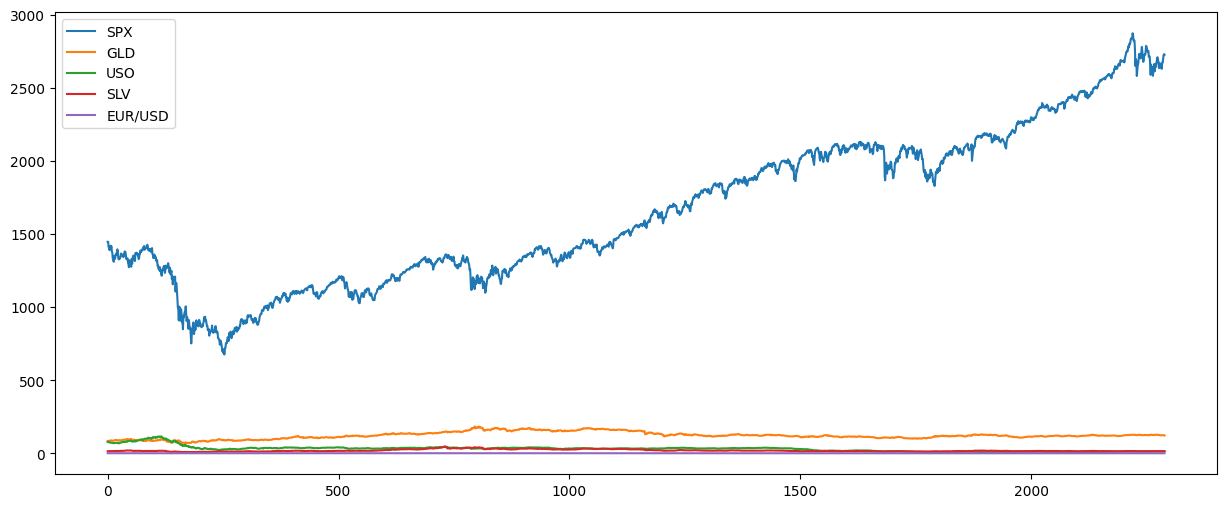

In [ ]:
plt.rcParams['figure.figsize'] = [15, 6] #resize the plot
goldData.plot()
plt.show()

In [ ]:
goldData.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [ ]:
goldData.mean() #to get mean

<ipython-input-15-38f47c0c83b7>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  goldData.mean() #to get mean


SPX        1654.315776
GLD         122.732875
USO          31.842221
SLV          20.084997
EUR/USD       1.283653
dtype: float64

In [ ]:
goldData.median() #to get the median

<ipython-input-16-ffc5e3592f4f>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  goldData.median() #to get the median


SPX        1551.434998
GLD         120.580002
USO          33.869999
SLV          17.268500
EUR/USD       1.303297
dtype: float64

In [ ]:
goldData.duplicated().sum() # check if there is repeated info

0

In [ ]:
data = goldData.drop(['Date'], axis=1) #drop date

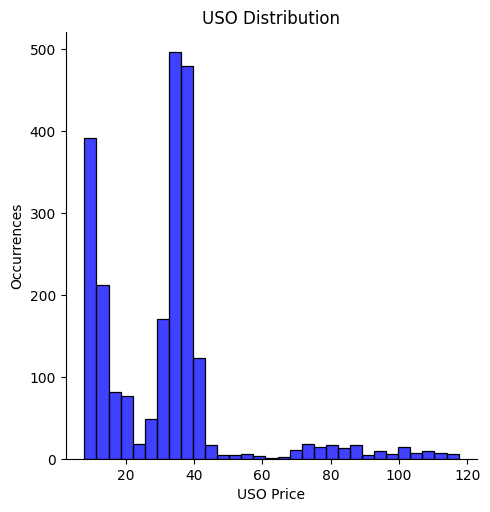

In [ ]:
sns.displot(goldData['USO'], color='blue')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

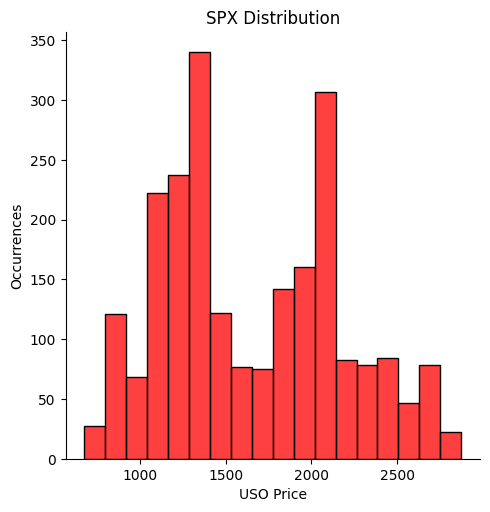

In [ ]:
sns.displot(goldData['SPX'], color='red')
plt.title('SPX Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

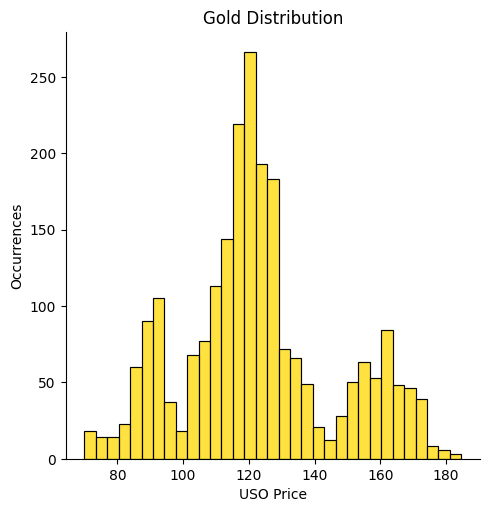

In [ ]:
sns.displot(goldData['GLD'], color='gold')
plt.title('Gold Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

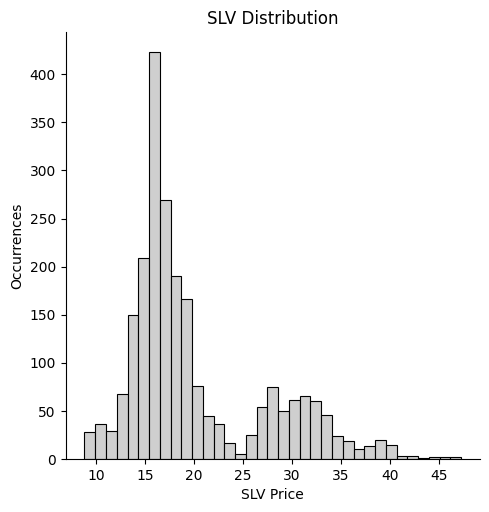

In [ ]:
sns.displot(goldData['SLV'], color='silver')
plt.title('SLV Distribution')
plt.xlabel('SLV Price')
plt.ylabel('Occurrences')
plt.show()

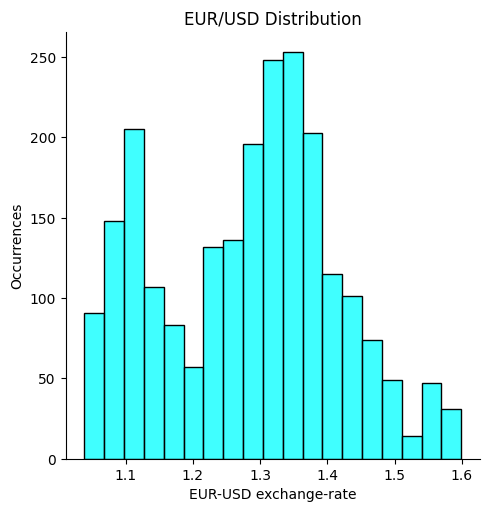

In [ ]:
sns.displot(goldData['EUR/USD'], color='cyan')
plt.title('EUR/USD Distribution')
plt.xlabel('EUR-USD exchange-rate')
plt.ylabel('Occurrences')
plt.show()

<ipython-input-50-8e8b89b806c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = goldData.corr()


<Axes: >

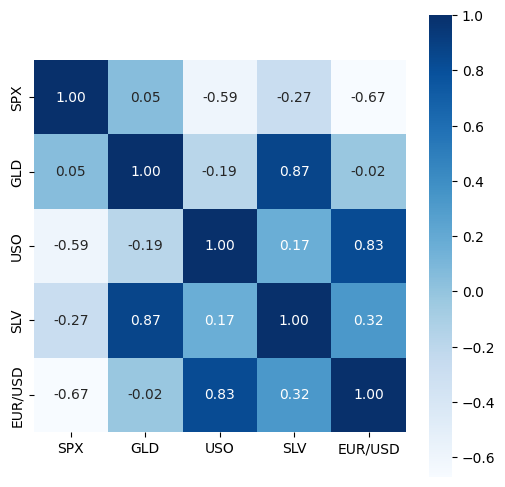

In [ ]:
correlation = goldData.corr()
plt.figure(figsize= (6,6))
sns.heatmap(correlation,square=True, fmt='.2f', annot=True,cmap='Blues')

In [ ]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [ ]:
X = data.drop(['GLD'], axis=1)
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [ ]:
# use the gold as the target
Y = data['GLD']
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [ ]:
#create test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
print(len(X_test))

458


In [ ]:
print(len(X_train))

1832


In [ ]:
regressor = RandomForestRegressor(n_estimators=100)
regressor

RandomForestRegressor()

In [ ]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
prediction = regressor.predict(X_test) #prediction
prediction

array([168.6665993 ,  81.81289989, 116.20009995, 127.62610109,
       120.69920119, 154.79749827, 150.06129804, 126.08860016,
       117.48959888, 125.91840045, 116.68530108, 171.84690082,
       141.1257987 , 167.85249804, 115.27549994, 117.49470043,
       137.90330323, 169.99370135, 159.78590365, 159.66130008,
       155.15170026, 125.2884001 , 175.69079936, 156.92050342,
       125.2380004 ,  93.99409946,  77.45570043, 120.40560015,
       119.1185994 , 167.54080014,  88.16340023, 125.27390043,
        91.23060068, 117.60530046, 121.0861989 , 136.51080176,
       115.53400127, 115.32550032, 147.98709947, 107.4258012 ,
       104.20730219,  87.28519822, 126.5231004 , 117.92619954,
       151.99929904, 119.52119991, 108.38459974, 107.96989852,
        93.1796003 , 127.16289754,  74.96070021, 113.59759925,
       121.46270018, 111.33999939, 118.93199875, 120.8966993 ,
       158.90279992, 168.72570083, 147.19289685,  85.98559848,
        94.42690038,  86.75309876,  90.6364001 , 118.88

In [ ]:
error = metrics.r2_score(Y_test, prediction)
error

0.9889953816486599

In [ ]:
Y_test = list(Y_test)

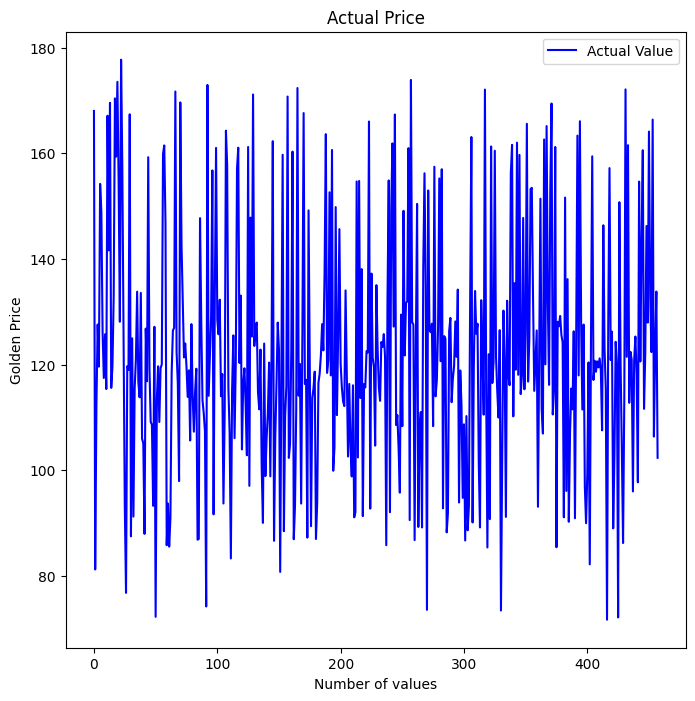

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]#resize the plot
plt.plot(Y_test, color='blue', label='Actual Value')
plt.title('Actual Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

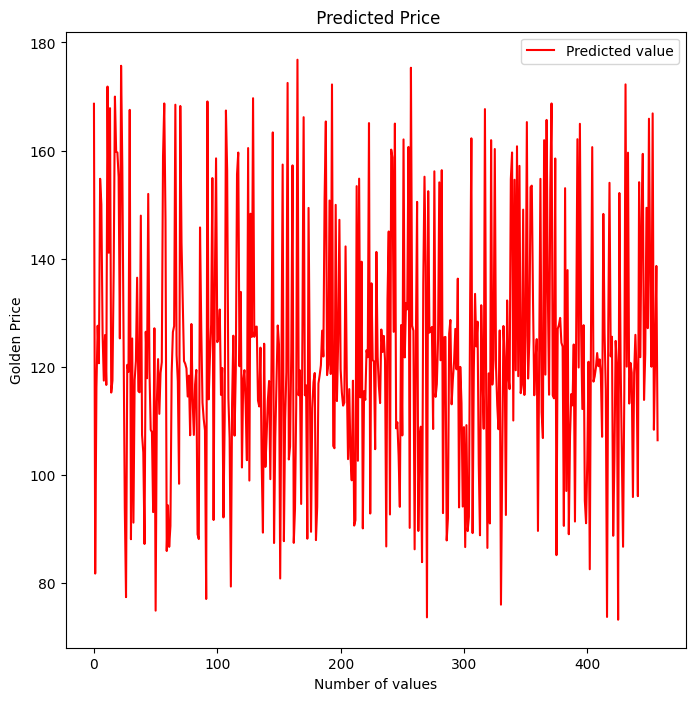

In [ ]:
plt.plot(prediction, color='red', label='Predicted value')
plt.title(' Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

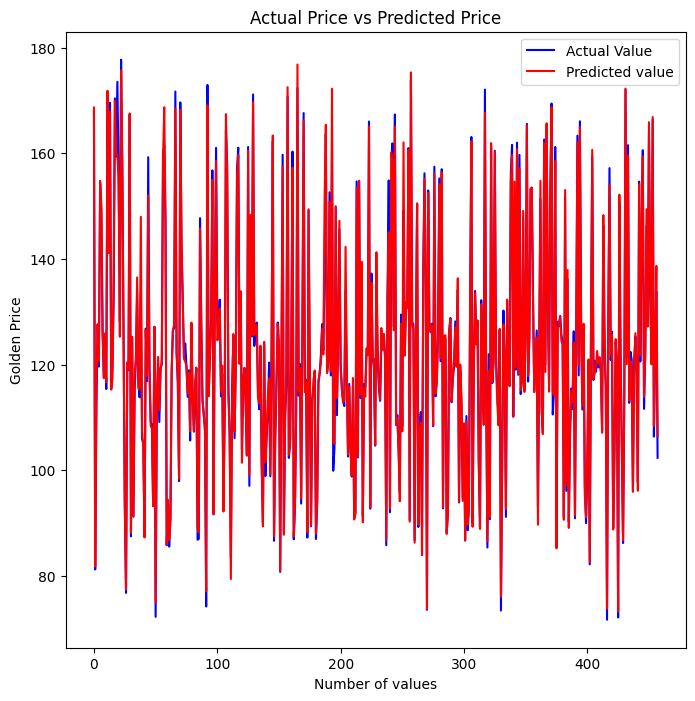

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()